## Assignment - Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

                                                                        Author by:
                                                                              Dr Manjunath M
                                                                              www.linkedin.com/in/dr-manjunath-m 

### Step 1: Data Sourcing
####  1.1 Importing Packages python package for analysing the Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#### 1. 2 Loading the houses Dataset using following code

In [2]:
# reading the dataset using pandas 
house_df = pd.read_csv("train.csv")

#### 1.3 Analying the Number of Rows and Columns using shape attribute

In [3]:
house_df.shape

(1460, 81)

#### 1.4 Displaying Maximum number of Rows and column of Data Frame

In [4]:
pd.set_option("display.max.columns", 81)
pd.set_option("display.max.rows",100)

#### 1.5 Displaying Top Five records of house dataset

In [5]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 1.6 Displaying Information about the house DataFrame using info()

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1.7 Displaying Description About the House DataFrame using describe()

In [7]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 1.8 Analysing missing values, Not a Number (NaN) values in each columns and row

In [8]:
house_df.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

#### 1.9 Analysisng the null values in each column of House Dataset

In [9]:
house_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### 1.10 Analysising count  of null values present in the dataset

In [10]:
round(house_df.isnull().sum()/len(house_df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### 1.11 Checking the percentage of Null values

In [11]:
house_df_missing=pd.DataFrame((round(100*(house_df.isnull().sum()/len(house_df.index)), 2)), columns=['missing'])
house_df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


#### 1.12 Analysing columns with one unique value  using nunique()

In [12]:
house_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

#### 1.13 Analysing and Treating NaN Values  in each columns and row

In [13]:
house_df['PoolQC'] = house_df['PoolQC'].fillna('No_Pool')
house_df['MiscFeature'] = house_df['MiscFeature'].fillna('None')
house_df['Alley'] = house_df['Alley'].fillna('No_Alley_Access')
house_df['Fence'] = house_df['Fence'].fillna('No_Fence')
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No_Fireplace')
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)
house_df['Electrical'] = house_df['Electrical'].fillna("Other")

#### 1.14 Analysising count of null values present in the dataset after treating na values in the features

In [14]:
round(house_df.isnull().sum()/len(house_df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

#### 1.15 Dropping the LotFontgage columns for having more Null values

In [15]:
house_df.drop("LotFrontage",axis = 1, inplace=True)

#### 1.16 Analysising count of null values present in the dataset after treating null values in the features 

In [16]:
round(house_df.isnull().sum()/len(house_df.index)*100,2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

#### 1.17 Assigning the NaN values with 'no garage' 

In [17]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_df[col] = house_df[col].fillna('No_Garage')

In [18]:
### Verifying the percentage of null values once again 
round(house_df.isnull().sum()/len(house_df.index)*100,2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

#### 1.18 Dropping Not a Number using following commands 

In [19]:
## Since 
#BsmtQual         2.53
#BsmtCond         2.53
#BsmtExposure     2.60
#BsmtFinType1     2.53
#BsmtFinType2     2.60 has some percentage of na values, let us drop it

house_df.dropna(axis=0, subset=["BsmtQual"], inplace=True)
house_df.dropna(axis=0, subset=["BsmtCond"], inplace=True)
house_df.dropna(axis=0, subset=["BsmtExposure"], inplace=True)
house_df.dropna(axis=0, subset=["BsmtFinType1"], inplace=True)
house_df.dropna(axis=0, subset=["BsmtFinType2"], inplace=True)

#### 1.19 Analysising percentage of  null values  in the dataset once agian in the dataset  

In [20]:
round(house_df.isnull().sum()/len(house_df.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

#### 1.20 Displaying Information about the House DataFrame using info()

In [21]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1421 non-null   int64  
 1   MSSubClass     1421 non-null   int64  
 2   MSZoning       1421 non-null   object 
 3   LotArea        1421 non-null   int64  
 4   Street         1421 non-null   object 
 5   Alley          1421 non-null   object 
 6   LotShape       1421 non-null   object 
 7   LandContour    1421 non-null   object 
 8   Utilities      1421 non-null   object 
 9   LotConfig      1421 non-null   object 
 10  LandSlope      1421 non-null   object 
 11  Neighborhood   1421 non-null   object 
 12  Condition1     1421 non-null   object 
 13  Condition2     1421 non-null   object 
 14  BldgType       1421 non-null   object 
 15  HouseStyle     1421 non-null   object 
 16  OverallQual    1421 non-null   int64  
 17  OverallCond    1421 non-null   int64  
 18  YearBuil

#### 1.21    Creation of new Numerical dataframe by  dropping the categorical columns 

In [22]:
house_numeric = house_df.drop(['MSSubClass', 'OverallCond', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',  
                                   'MoSold', 'YrSold', 'ScreenPorch', "PoolArea", "MiscVal"], axis=1)
### Displaying Top 5 records
house_numeric.head() 


,Id,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,2,Gd,Typ,No_Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,No_Pool,No_Fence,None,WD,Normal,208500
1,2,RL,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,TA,Typ,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,No_Pool,No_Fence,None,WD,Normal,181500
2,3,RL,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,2,Gd,Typ,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,No_Pool,No_Fence,None,WD,Normal,223500
3,4,RL,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,Gd,Typ,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,No_Pool,No_Fence,None,WD,Abnorml,140000
4,5,RL,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,Gd,Typ,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,No_Pool,No_Fence,None,WD,Normal,250000


#### 1.22 Displaying Information of new dataframe (house_numeric) using info()

In [23]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1421 non-null   int64  
 1   MSZoning       1421 non-null   object 
 2   LotArea        1421 non-null   int64  
 3   Street         1421 non-null   object 
 4   Alley          1421 non-null   object 
 5   LotShape       1421 non-null   object 
 6   LandContour    1421 non-null   object 
 7   Utilities      1421 non-null   object 
 8   LotConfig      1421 non-null   object 
 9   LandSlope      1421 non-null   object 
 10  Neighborhood   1421 non-null   object 
 11  Condition1     1421 non-null   object 
 12  Condition2     1421 non-null   object 
 13  BldgType       1421 non-null   object 
 14  HouseStyle     1421 non-null   object 
 15  OverallQual    1421 non-null   int64  
 16  YearBuilt      1421 non-null   int64  
 17  RoofStyle      1421 non-null   object 
 18  RoofMatl

### Step 2: Plotting Data
#### 2.1 Analysing description house_numeric DataFrame using describe() with percentage to detect the outliers

In [24]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SalePrice
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.00000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,730.927516,10546.069669,6.144265,1971.606615,104.699507,455.024631,47.489796,581.021816,1083.536242,1163.947924,351.173118,5.967628,1521.088670,1.562984,1.77551,475.620690,96.104856,47.486277,22.020408,3.376495,182800.344124
std,422.306970,10101.151938,1.359221,30.381507,181.954082,456.087980,162.935810,437.245424,405.795317,386.907768,437.807445,49.260950,526.498454,0.551319,0.74370,213.038227,126.156770,66.706615,61.203128,29.340060,79397.629776
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,366.000000,7585.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,247.000000,810.000000,882.000000,0.000000,0.000000,1138.000000,1.000000,1.00000,336.000000,0.000000,0.000000,0.000000,0.000000,131500.000000
50%,729.000000,9500.000000,6.000000,1974.000000,0.000000,400.000000,0.000000,490.000000,1004.000000,1088.000000,0.000000,0.000000,1468.000000,2.000000,2.00000,480.000000,0.000000,26.000000,0.000000,0.000000,165000.000000
75%,1099.000000,11625.000000,7.000000,2001.000000,168.000000,724.000000,0.000000,813.000000,1309.000000,1392.000000,732.000000,0.000000,1786.000000,2.000000,2.00000,576.000000,168.000000,69.000000,0.000000,0.000000,215000.000000
90%,1316.000000,14442.000000,8.000000,2006.000000,336.000000,1074.000000,123.000000,1234.000000,1606.000000,1680.000000,960.000000,0.000000,2167.000000,2.000000,3.00000,758.000000,264.000000,131.000000,112.000000,0.000000,280000.000000
95%,1388.000000,17423.000000,8.000000,2007.000000,456.000000,1274.000000,400.000000,1468.000000,1753.000000,1836.000000,1142.000000,0.000000,2473.000000,2.000000,3.00000,852.000000,335.000000,180.000000,180.000000,0.000000,328900.000000
99%,1445.800000,38583.200000,10.000000,2009.000000,794.400000,1572.800000,837.400000,1799.000000,2149.600000,2221.800000,1409.600000,360.000000,3134.400000,3.000000,3.00000,1010.200000,507.800000,286.600000,263.000000,166.800000,445008.800000


#### 2.2 Ploting Box plot of numerical variables to detect the hidden patterns of the dataset

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

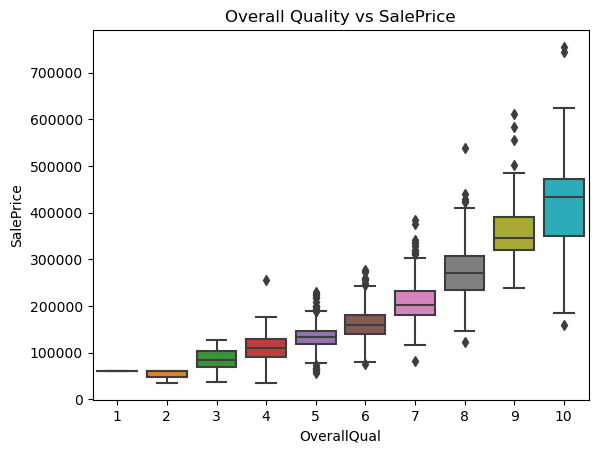

In [25]:
# Analysing the outliers using boxplot for OverallQual and SalePrice variables
sns.boxplot(x='OverallQual', y='SalePrice', data=house_numeric)
plt.title("Overall Quality vs SalePrice")

#### 2.3  Analysing the outliers of SalePrice using Boxplot

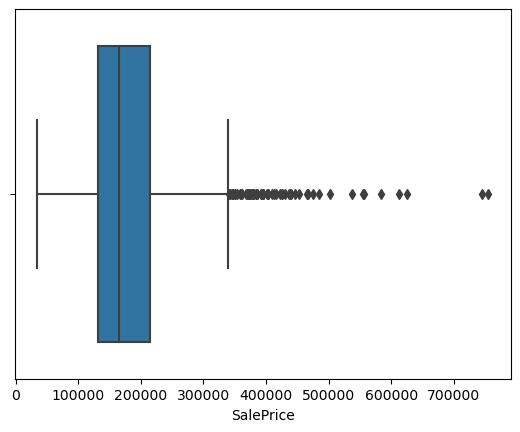

In [26]:
sns.boxplot(x='SalePrice', data=house_numeric)
plt.show()

#### 2.4  outlier treatment using Boxplot

(1397, 64)

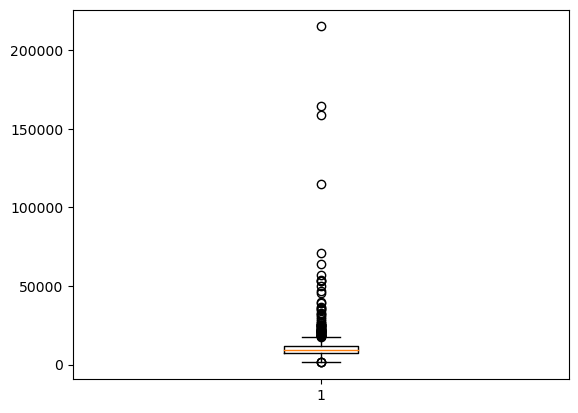

In [27]:
plt.boxplot(house_numeric['LotArea'])
Q1 = house_numeric['LotArea'].quantile(0.1)
Q3 = house_numeric['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house_numeric = house_numeric[(house_numeric['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house_numeric['LotArea'] <= Q3 + 1.5*IQR)]
house_numeric.shape

(1391, 64)

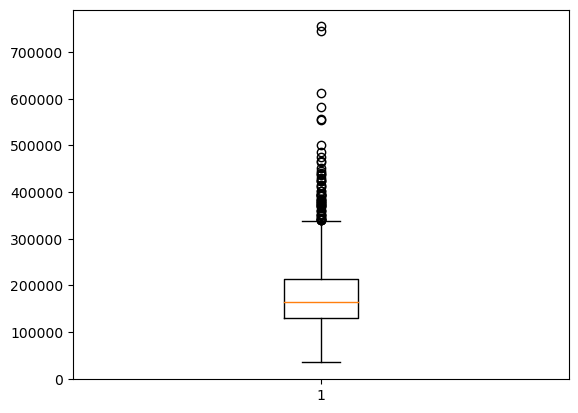

In [28]:
# outlier treatment using boxplot   

plt.boxplot(house_numeric['SalePrice'])
Q1 = house_numeric['SalePrice'].quantile(0.1)
Q3 = house_numeric['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house_numeric = house_numeric[(house_numeric['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house_numeric['SalePrice'] <= Q3 + 1.5*IQR)]
house_numeric.shape

#### 2.5 Analysing the correlation matrix using corr()

In [29]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SalePrice
Id,1.000000,0.000181,-0.030342,-0.015021,-0.064586,-0.012099,0.003365,-0.010367,-0.024734,0.003190,-0.003976,-0.045606,-0.005774,-0.000054,0.014980,0.012575,-0.026900,-0.005172,0.003188,-0.042739,-0.027578
LotArea,0.000181,1.000000,0.193414,0.046533,0.112667,0.162528,0.070307,0.096152,0.331010,0.404449,0.110528,0.041100,0.400856,0.188830,0.268707,0.312580,0.143839,0.130790,0.019638,0.084751,0.396795
OverallQual,-0.030342,0.193414,1.000000,0.569003,0.385329,0.175215,-0.082699,0.279769,0.497553,0.469603,0.267649,-0.033817,0.579615,0.571885,0.609767,0.562753,0.226142,0.296673,-0.120919,0.034281,0.809870
YearBuilt,-0.015021,0.046533,0.569003,1.000000,0.305036,0.239863,-0.054373,0.133325,0.409886,0.281050,-0.010968,-0.186911,0.179459,0.479190,0.539263,0.477680,0.232800,0.181905,-0.393875,0.033451,0.548633
MasVnrArea,-0.064586,0.112667,0.385329,0.305036,1.000000,0.209078,-0.072508,0.102722,0.330377,0.306776,0.134997,-0.071210,0.338612,0.248305,0.353698,0.354155,0.143955,0.092194,-0.113223,0.022509,0.450070
BsmtFinSF1,-0.012099,0.162528,0.175215,0.239863,0.209078,1.000000,-0.071237,-0.591522,0.412564,0.369613,-0.201289,-0.069380,0.089678,0.036314,0.198737,0.245176,0.170804,0.055837,-0.105994,0.035666,0.358822
BsmtFinSF2,0.003365,0.070307,-0.082699,-0.054373,-0.072508,-0.071237,1.000000,-0.224922,0.083797,0.094396,-0.100561,0.016241,-0.016855,-0.080923,-0.052089,-0.026237,0.069084,0.014138,0.042673,-0.029713,-0.039846
BsmtUnfSF,-0.010367,0.096152,0.279769,0.133325,0.102722,-0.591522,-0.224922,1.000000,0.412976,0.353489,-0.016848,0.025863,0.249584,0.297445,0.210818,0.179851,-0.009180,0.112501,-0.004639,0.023345,0.203246
TotalBsmtSF,-0.024734,0.331010,0.497553,0.409886,0.330377,0.412564,0.083797,0.412976,1.000000,0.884654,-0.294291,-0.041771,0.392119,0.360096,0.455822,0.483445,0.214791,0.203825,-0.108553,0.055771,0.635637
1stFlrSF,0.003190,0.404449,0.469603,0.281050,0.306776,0.369613,0.094396,0.353489,0.884654,1.000000,-0.262346,-0.011732,0.508676,0.377089,0.434755,0.470685,0.229146,0.181864,-0.060686,0.064428,0.627626


#### 2.6 Analysing the Correlation of each numerical variables using heatmap()

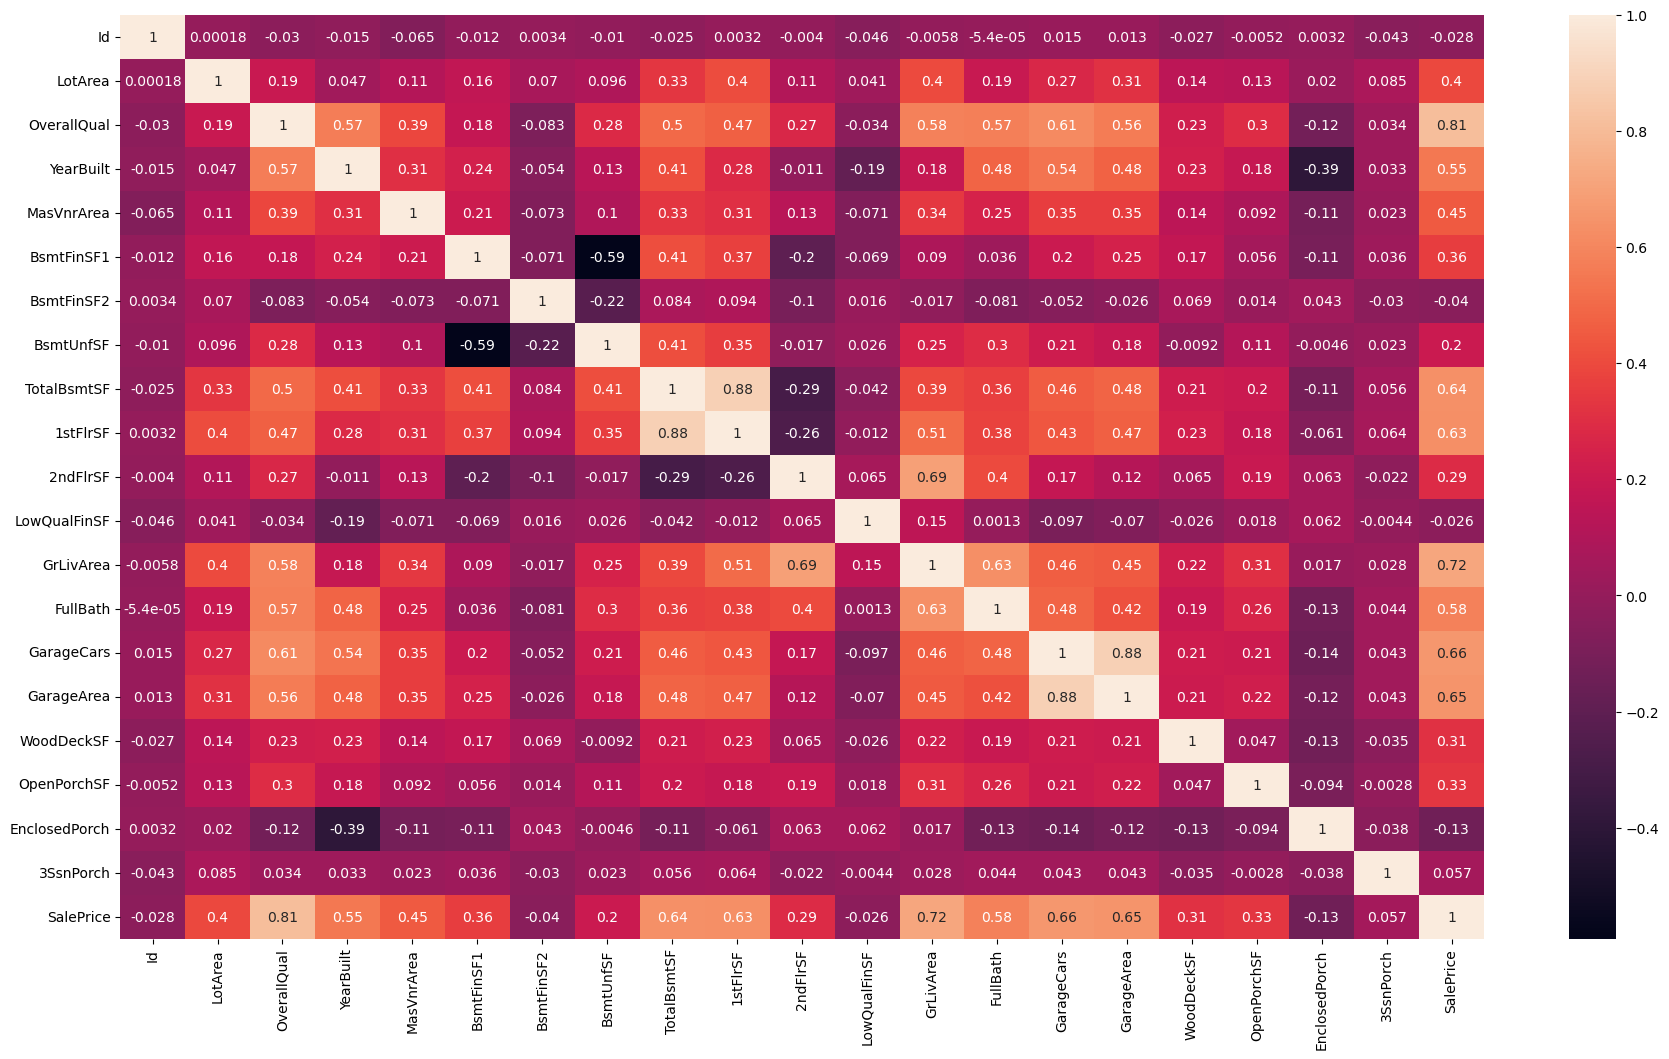

In [30]:
# Correlation  using  heatmap
plt.figure(figsize=(22,12))
sns.heatmap(cor, annot=True)
plt.show()

#### 2.7 Analysing the linear relationship between MasVnrArea and SalePrice variables using scatter plot

Text(0.5, 1.0, 'MasVnr Area')

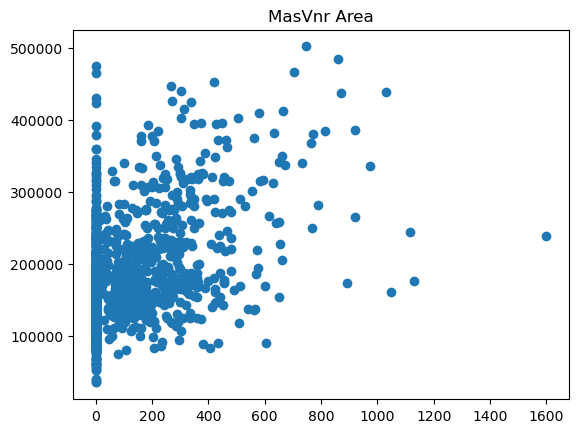

In [31]:
plt.scatter(house_numeric.MasVnrArea,house_numeric.SalePrice)
plt.title('MasVnr Area')

#### 2.8 Analysing the MasVnrArea variables using distplot plot

Text(0.5, 1.0, 'Veneer Area')

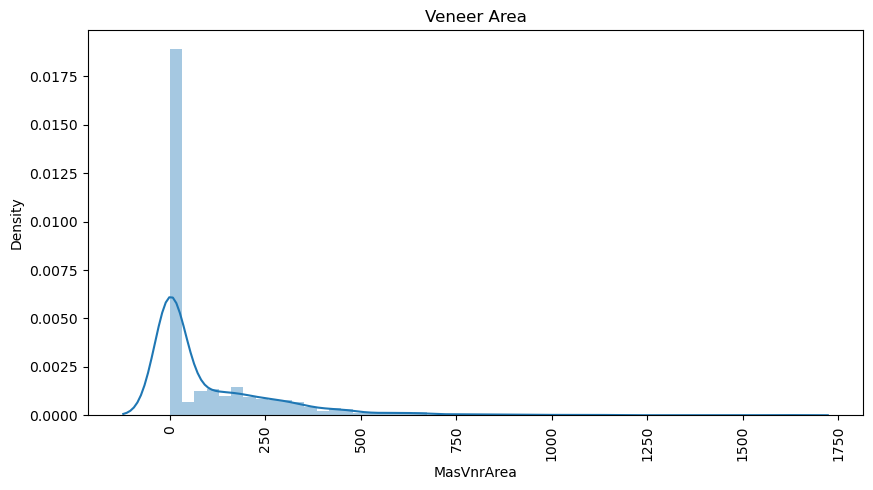

In [32]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(house_numeric['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

#### 2.9 Checking Basement counts using countplot

Text(0.5, 1.0, 'Basement Condition')

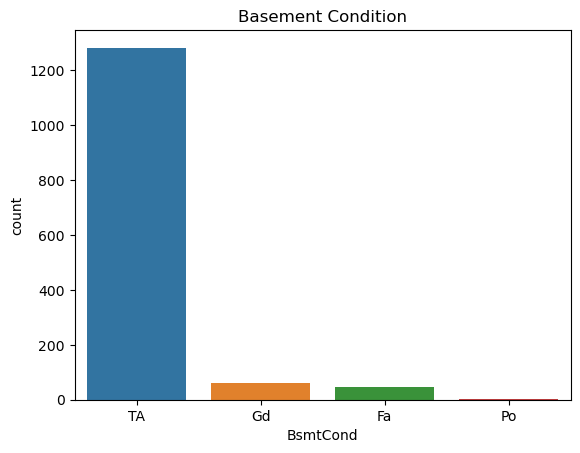

In [33]:
sns.countplot(x='BsmtCond', data= house_numeric)
plt.title('Basement Condition')

#### 2.10 Analysisng the linear relationship of numerical varialbe  using pairplot 

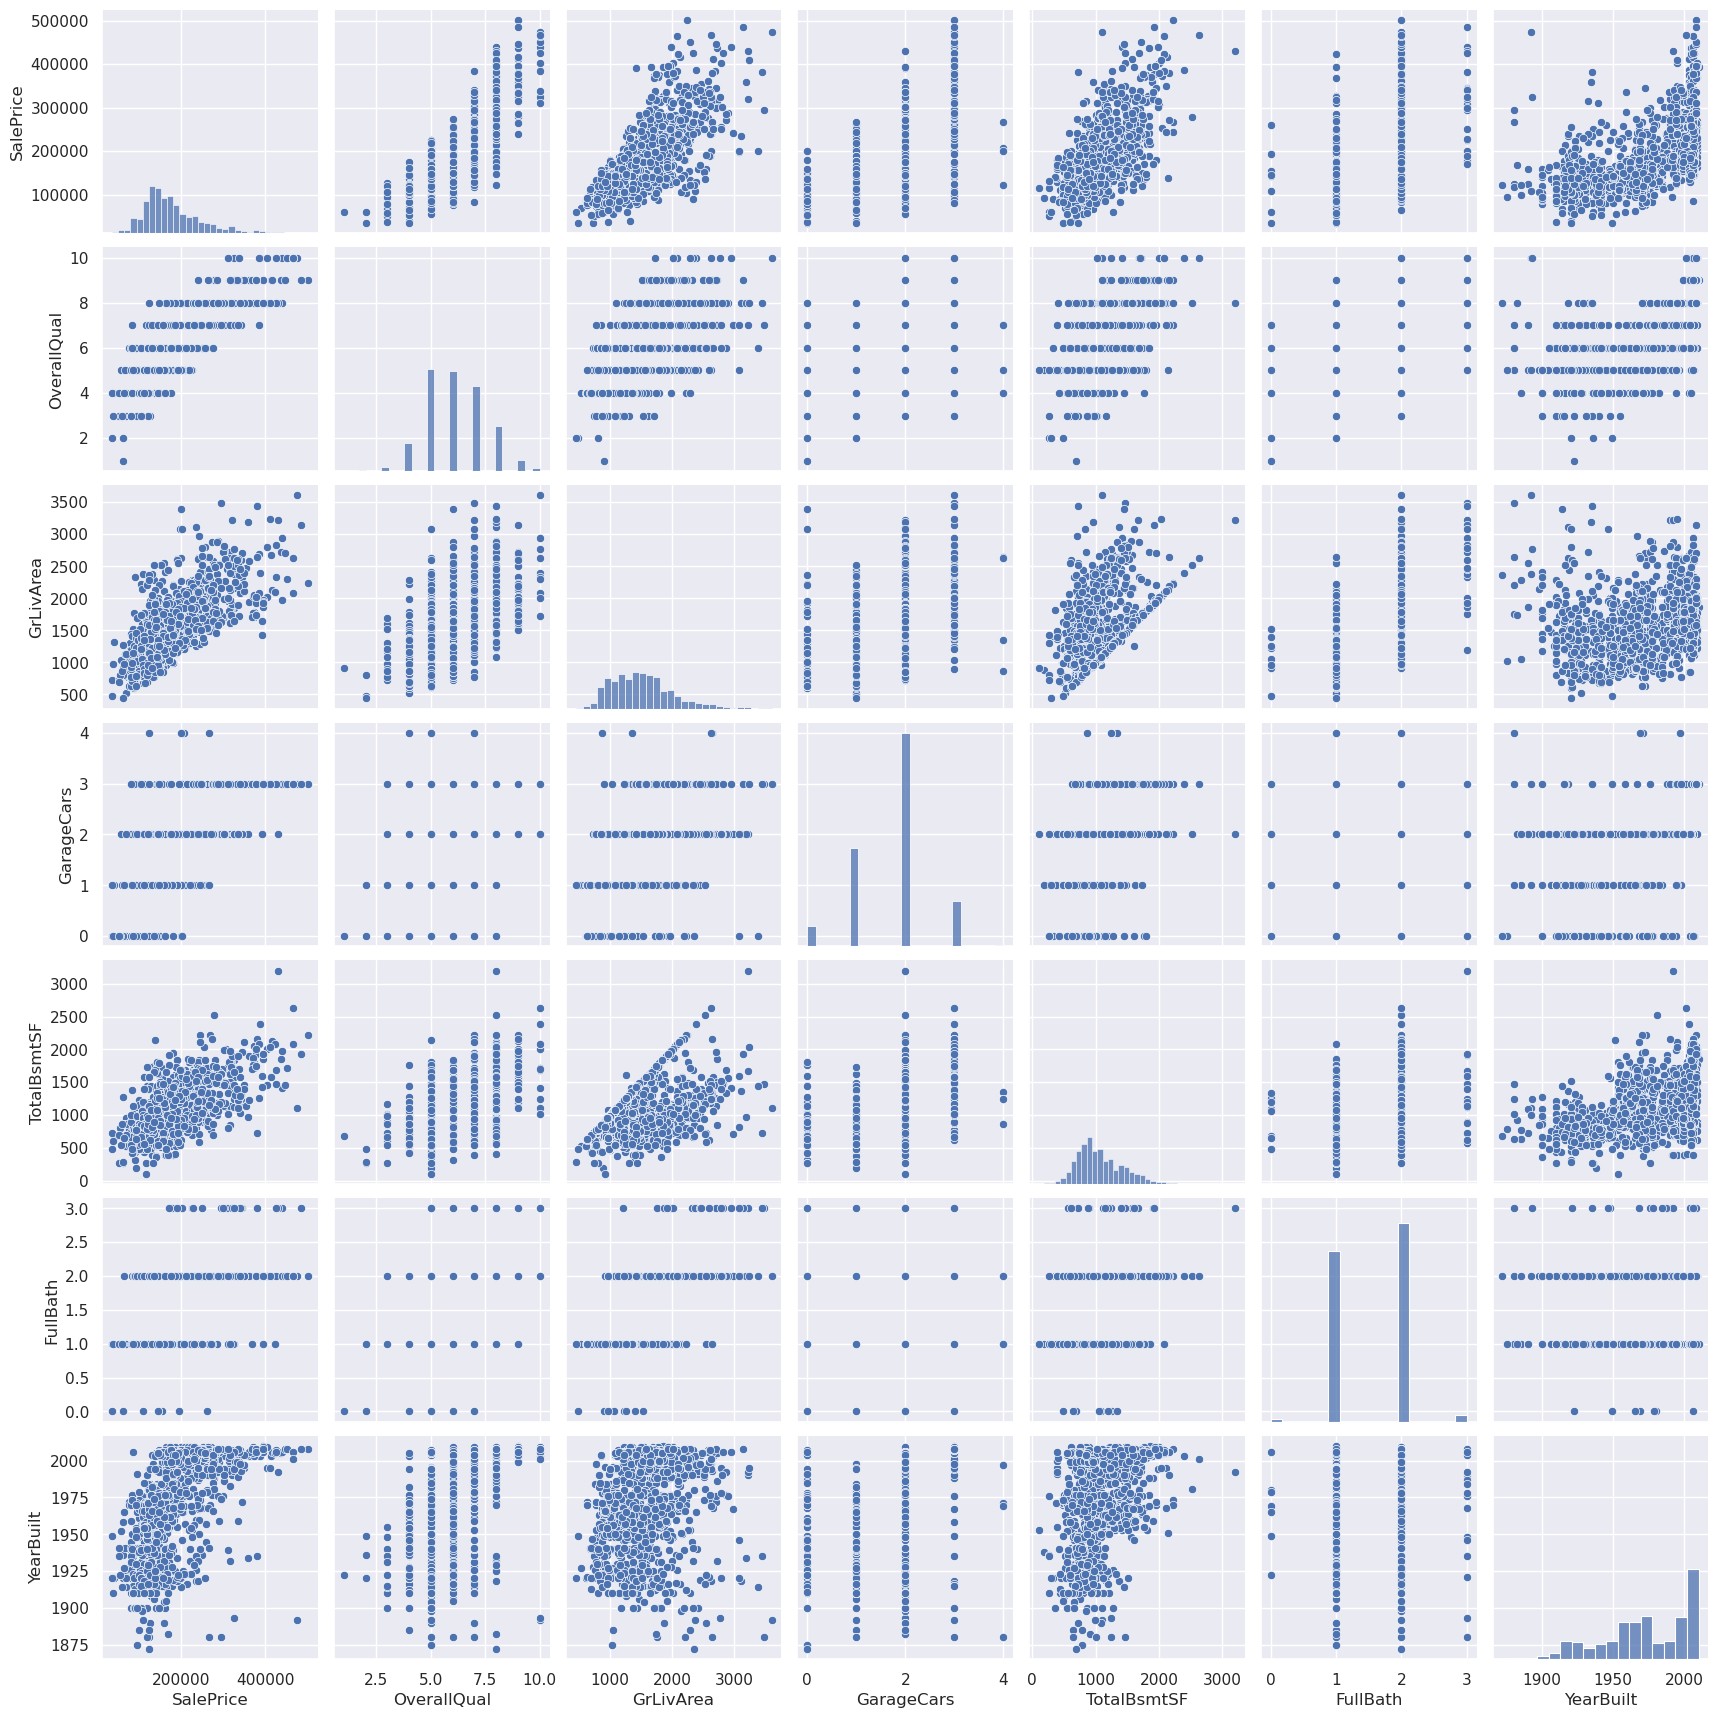

In [34]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_numeric[cols], size = 2.5)
plt.show();

#### 2.11 Ploting distplot for SalePrice Variables 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

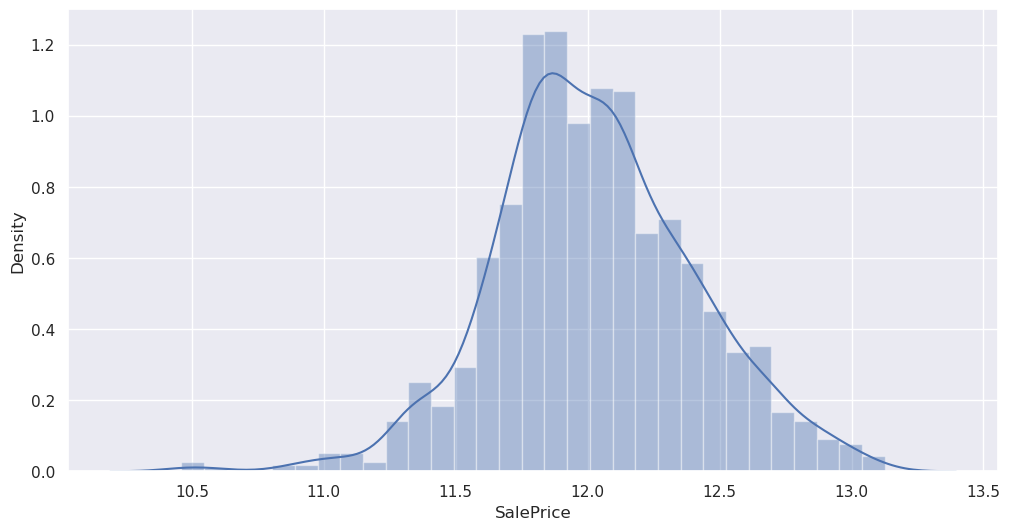

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(np.log(house_numeric["SalePrice"]))

#### 2.12 Converting a Binary varible into numeric datatypes mapping it to 0 and 1 using following code

In [36]:
#Converting a Binary varible into numeric datatypes
house_numeric['Street'] = house_numeric['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
house_numeric['CentralAir'] = house_numeric['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
house_numeric['PavedDrive'] = house_numeric['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

#### 2.13 Displaying Top 5 records of house_numeric Data Frame

In [37]:
house_numeric.head()

,Id,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,RL,8450,1,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,2,Gd,Typ,No_Fireplace,Attchd,RFn,2,548,TA,TA,1,0,61,0,0,No_Pool,No_Fence,None,WD,Normal,208500
1,2,RL,9600,1,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,2,TA,Typ,TA,Attchd,RFn,2,460,TA,TA,1,298,0,0,0,No_Pool,No_Fence,None,WD,Normal,181500
2,3,RL,11250,1,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,2,Gd,Typ,TA,Attchd,RFn,2,608,TA,TA,1,0,42,0,0,No_Pool,No_Fence,None,WD,Normal,223500
3,4,RL,9550,1,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,Gd,Typ,Gd,Detchd,Unf,3,642,TA,TA,1,0,35,272,0,No_Pool,No_Fence,None,WD,Abnorml,140000
4,5,RL,14260,1,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,2,Gd,Typ,TA,Attchd,RFn,3,836,TA,TA,1,192,84,0,0,No_Pool,No_Fence,None,WD,Normal,250000


#### 2.14 Analysing the Catogorical Variables in Dataframe 

In [38]:
cat_values = house_numeric.select_dtypes(include=['object'])
cat_values.head() 

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


### 3. Choose the model
#### 3.1 Dummy Variables
-  Dummy variables are often used to encode categorical variables into a numerical format that can be processed by a learning algorithm. This is done because many machine learning algorithms only work with numerical data, and cannot handle categorical data directly

In [39]:
# convert into dummy variables
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_No_Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### 3.2  Creating new DataFrame called df after creating dummy varibale and by droping  Id variable

In [40]:
## Droping the 'Id' column 
df = house_numeric.drop(['Id'],axis=1)  

#### 3.3  Droping all categorical columns in df data frame

In [41]:
df = df.drop(list(cat_values.columns), axis=1)


#### 3.3  Concating dummy variable data frame and df data frame using concat()

In [42]:
df = pd.concat([df,data_dummies], axis=1)


In [43]:
## Analysing the shape of new data frame df using shape attribute
df.shape

(1391, 232)

### 3.4. Splitting the Data

In [44]:
### train dataset and test dataset using train_test_split()
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [45]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [46]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch'],
      dtype='object')

#### 3.5 Rescaling the Features using StandardScaler of sklearn module

In [47]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## 4. Building A Linear Model using LinearRegression()

In [48]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

#### 4.1 Running RFE with the output number of the variable equal to 20


In [49]:
rfe = RFE(reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

#### 4.2 Diplays the selected feature in RFE

In [50]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GrLivArea', 'MSZoning_RM', 'Neighborhood_Veenker',
       'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_Metal',
       'Exterior1st_BrkComm', 'Exterior2nd_CBlock', 'Heating_Grav',
       'Heating_OthW', 'HeatingQC_Po', 'Electrical_FuseP', 'KitchenQual_Fa',
       'Functional_Maj2', 'Functional_Sev', 'GarageQual_No_Garage',
       'GarageCond_Fa', 'PoolQC_No_Pool', 'SaleType_Oth'],
      dtype='object')

#### 4.3 Importing variance_inflation_factor  using state module 

In [51]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### 4.4 Building Linear Model  using Statsmodel 

In [52]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sat, 08 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:15:31   Log-Likelihood:                 386.58
No. Observations:                 973   AIC:                            -731.2
Df Residuals:                     952   BIC:                            -628.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6389      0.165     70.361      0.000      11.314      11.964
OverallQual              0.2012      0.007     29.191      0.000       0.188       0.215
GrLivArea                0.1388      0.007     20.783      0.000       0.126       0.152
MSZoning_RM             -0.1780      0.015    -12.027      0.000      -0.207      -0.149
Neighborhood_Veenker     0.1830      0.058      3.132      0.002       0.068       0.298
Condition2_RRAe         -0.3248      0.234     -1.391      0.165      -0.783       0.134
RoofStyle_Shed           0.2649      0.165      1.610      0.108      -0.058       0.588
RoofMatl_Metal           0.1969      0.165      1.196      0.232      -0.126       0.520
Exterior1st_BrkComm     -0.8340      0.165     -5.066      0.000      -1.157      -0.511
Exterior2nd_CBlock      -0.1532      0.165     -0.929      0.353      -0.477       0.170
Heating_Grav            -0.2377      0.066     -3.597      0.000      -0.367      -0.108
Heating_OthW            -0.3409      0.119     -2.855      0.004      -0.575      -0.107
HeatingQC_Po            -0.1512      0.165     -0.916      0.360      -0.475       0.173
Electrical_FuseP        -0.3156      0.165     -1.911      0.056      -0.640       0.008
KitchenQual_Fa          -0.1098      0.034     -3.206      0.001      -0.177      -0.043
Functional_Maj2         -0.3872      0.083     -4.675      0.000      -0.550      -0.225
Functional_Sev          -0.5283      0.165     -3.202      0.001      -0.852      -0.205
GarageQual_No_Garage    -0.1367      0.027     -5.069      0.000      -0.190      -0.084
GarageCond_Fa           -0.1346      0.036     -3.791      0.000      -0.204      -0.065
PoolQC_No_Pool           0.4323      0.165      2.613      0.009       0.108       0.757
SaleType_Oth             0.2060      0.117      1.756      0.079      -0.024       0.436
==============================================================================
Omnibus:                       82.117   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.610
Skew:                          -0.477   Prob(JB):                     1.23e-43
Kurtosis:                       4.991   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 Building Linear Model  using Ridge Regression

In [53]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation = 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### 5.1 Displaying the best Parameter setting that gave the best results and best Score using following code

In [54]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 7.0}
-0.08599202680670526


#### 5.2 Displaying the obtained results

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008407,0.001682,0.003776,0.000396,0.0001,{'alpha': 0.0001},-0.095484,-0.096929,-0.090169,-0.106425,-0.096222,-0.097045,0.005261,26,-0.063488,-0.064092,-0.064676,-0.059533,-0.060021,-0.062362,0.002149
1,0.006407,0.001223,0.003100,0.000856,0.001,{'alpha': 0.001},-0.095417,-0.096885,-0.090143,-0.106347,-0.096211,-0.097001,0.005245,25,-0.063500,-0.064097,-0.064680,-0.059548,-0.060032,-0.062371,0.002146
2,0.004312,0.000056,0.002038,0.000015,0.01,{'alpha': 0.01},-0.094808,-0.096486,-0.089909,-0.105695,-0.096099,-0.096599,0.005118,24,-0.063609,-0.064157,-0.064723,-0.059736,-0.060149,-0.062475,0.002102
3,0.005073,0.001087,0.002867,0.000778,0.05,{'alpha': 0.05},-0.092932,-0.094966,-0.089160,-0.103901,-0.095602,-0.095312,0.004848,23,-0.064003,-0.064446,-0.064876,-0.060428,-0.060617,-0.062874,0.001941
4,0.004583,0.000662,0.002085,0.000045,0.1,{'alpha': 0.1},-0.092363,-0.093512,-0.088494,-0.102503,-0.095072,-0.094389,0.004603,22,-0.064395,-0.064768,-0.065044,-0.060917,-0.061060,-0.063237,0.001848
5,0.004279,0.000056,0.002100,0.000064,0.2,{'alpha': 0.2},-0.091618,-0.091401,-0.087945,-0.100699,-0.094250,-0.093183,0.004259,21,-0.064975,-0.065265,-0.065303,-0.061496,-0.061694,-0.063747,0.001761
6,0.004458,0.000461,0.002058,0.000030,0.3,{'alpha': 0.3},-0.091048,-0.089805,-0.087659,-0.099381,-0.093708,-0.092320,0.004036,20,-0.065381,-0.065637,-0.065516,-0.061890,-0.062137,-0.064112,0.001717
7,0.004272,0.000058,0.002048,0.000025,0.4,{'alpha': 0.4},-0.090638,-0.088489,-0.087418,-0.098322,-0.093273,-0.091628,0.003900,19,-0.065695,-0.065949,-0.065695,-0.062229,-0.062496,-0.064413,0.001679
8,0.004239,0.000046,0.002038,0.000012,0.5,{'alpha': 0.5},-0.090283,-0.087415,-0.087238,-0.097443,-0.092912,-0.091058,0.003812,18,-0.065951,-0.066243,-0.065851,-0.062502,-0.062802,-0.064670,0.001655
9,0.004493,0.000608,0.002038,0.000005,0.6,{'alpha': 0.6},-0.089975,-0.086517,-0.087140,-0.096687,-0.092620,-0.090588,0.003746,17,-0.066177,-0.066499,-0.065994,-0.062734,-0.063074,-0.064896,0.001638


#### 5.3 Plotting mean test and train scoes with alpha parameter

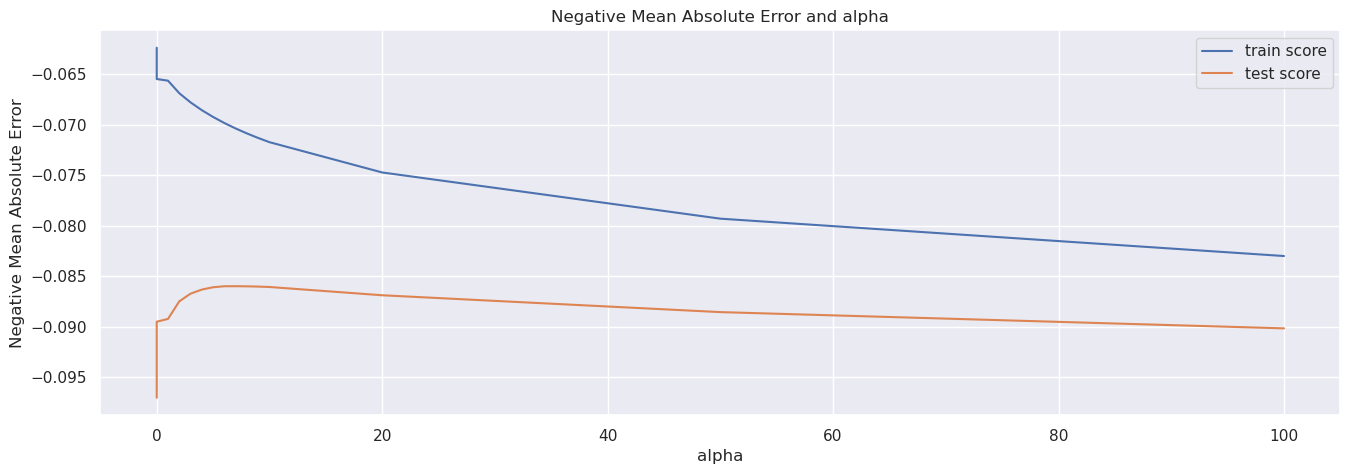

In [56]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

#### 5.4 Display the final redge model with alpha = 7.0

In [57]:
#final ridge model
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02704823,  0.00765599,  0.07832115,  0.03824998,  0.00498589,
        0.02875086,  0.00964268, -0.0055099 ,  0.03076767,  0.02007919,
        0.04012622,  0.04828106,  0.00414411,  0.07265985,  0.00354304,
        0.02761662,  0.00841686,  0.00663484,  0.00871762,  0.01351608,
        0.00232794,  0.00237802,  0.04250767, -0.01187218,  0.05644362,
        0.01809393, -0.00435367,  0.02453088,  0.0011734 , -0.01804442,
       -0.00077994,  0.02333221, -0.02073634, -0.00297743, -0.0118972 ,
        0.02008912, -0.02941562, -0.01154225, -0.01005951,  0.02254589,
       -0.03059409, -0.00726297, -0.01431545,  0.05566835,  0.01007775,
       -0.01889393,  0.10638036, -0.04933838, -0.01533308,  0.00016766,
       -0.09284385, -0.03577222, -0.00702108,  0.02184482, -0.01834812,
        0.00396467,  0.03461483, -0.01514607, -0.02333239,  0.01210313,
       -0.03148529,  0.01356093,  0.05971692, -0.01812021,  0.04219594,
        0.01734189,  0.05598193,  0.02557175,  0.01179576, -0.00

#### 5.5 Prediction of R-squared value of ridge model

In [58]:
#lets predict the R-squared value on Train dataset
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9320623310024612


#### 5.6 Prediction of R-squared value of ridge model on test dataset

In [59]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8838637559122571


#### 5.7 Analysis of RMSE value of ridge model`

In [60]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.016385559916794013

### 6 Building Linear Model  using Lasso Regression
#### 6.1 Hyperparameter Tunning

In [61]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

#### 6.3 Displaying the best Parameter setting that gave the best results and best Score using following code

In [63]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08761633028008653


#### 6.4 Display the final lasso model with alpha = 0.001

In [64]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

#### 6.5 Prediction of R-squared value of lasso model on Train Dataset

In [65]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9163559352022809


#### 6.6 Prediction of R-squared value of lasso model on Test Dataset

In [66]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8851408972730134


#### 6.7 Analysis of R-mean_squared_error value of lasso model

In [67]:
mean_squared_error(y_test, y_test_pred)

0.016205369172265748

In [68]:
lasso.coef_

array([ 0.02941417,  0.00685999,  0.09527514,  0.0392527 ,  0.0035828 ,
        0.04208885,  0.00848042, -0.        ,  0.02584356,  0.0225311 ,
        0.00205369,  0.        , -0.0025261 ,  0.12369021,  0.        ,
        0.03010811,  0.01123328,  0.0090544 ,  0.00962722,  0.01384257,
        0.00221621,  0.00127886,  0.01977523, -0.        ,  0.03944841,
       -0.        , -0.        ,  0.01152203,  0.        , -0.        ,
       -0.00342013,  0.00361089, -0.        , -0.        , -0.        ,
        0.0089779 , -0.        , -0.        , -0.00223705,  0.0011903 ,
       -0.        , -0.        , -0.        ,  0.05166433,  0.        ,
       -0.        ,  0.11586727, -0.02579714, -0.        ,  0.        ,
       -0.05537448, -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.02033102, -0.        , -0.        ,  0.00262384,
       -0.01415128,  0.00455176,  0.00031768, -0.        ,  0.        ,
        0.        ,  0.03578783,  0.        ,  0.        , -0.  

#### 6.8 Plotting mean test and train scoes with alpha parameter

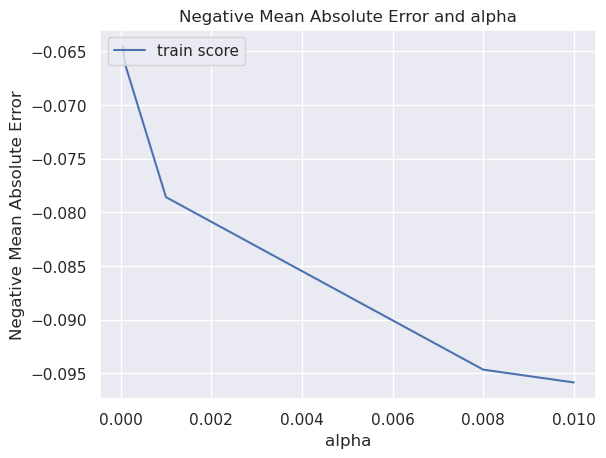

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
model_cv.best_params_

{'alpha': 7.0}

In [71]:
ridge = Ridge(alpha = 7.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9320623310024612
0.8838637559122571


In [72]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficent']

In [73]:
ridge_coef.sort_values(by='Coefficent',ascending=False).head(10)


,Features,Coefficent
0,LotArea,11.763777
47,Neighborhood_Crawfor,0.106380
230,SaleCondition_Normal,0.097444
183,Functional_Typ,0.091187
3,YearBuilt,0.078321
103,Exterior1st_BrkFace,0.074038
14,FullBath,0.072660
224,SaleType_New,0.068899
63,Neighborhood_StoneBr,0.059717
25,MSZoning_RL,0.056444


#### 6.9 Final prediction of lasso regression on test dataset

In [74]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9163559352022809
0.8851408972730134


#### Best alpha value for Lasso Regression is : {'alpha': 0.001}
#### Best alpha value for Ridge Regression : {'alpha': 7.0}

### Based on the comparison of the two models, we can see that the following features are the most accurate ones in explaining the DataSet

- LotArea 	
- Neighborhood_Crawfor 
- SaleCondition_Normal 
- Functional_Typ 	
- YearBuilt 	
- Exterior1st_BrkFace 	
- FullBath 	
- SaleType_New 	
- Neighborhood_StoneBr 	
- MSZoning_RL 	

## Part - 2 
**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Solution:**

    • Optimal value of alpha for Ridge Regression =7.0
    • Optimal value of alpha for Lasso = 0.001
    
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [75]:
#final lasso model after double the value of alpha for lasso
alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))



0.9062571525858014


In [76]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8849163293796485


In [77]:
mean_squared_error(y_test, y_test_pred)

0.016237053257634804

### When alph value of ridge model == 14

In [78]:
#final ridge model when alpha = 14.0
alpha = 14.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.73617458e-02,  7.75584888e-03,  8.24795604e-02,  3.50533225e-02,
        5.91325999e-03,  3.01210062e-02,  9.29297267e-03, -5.74811254e-03,
        3.19190425e-02,  2.14427095e-02,  4.02947808e-02,  4.62833126e-02,
        3.10411901e-03,  7.09316889e-02,  3.59755312e-03,  2.79553556e-02,
        9.19900795e-03,  7.85615594e-03,  8.51753998e-03,  1.37198033e-02,
        2.42289394e-03,  2.41130221e-03,  2.76848960e-02, -1.30025128e-02,
        4.32625706e-02,  5.27236527e-04, -4.77172528e-03,  2.09701134e-02,
        2.06246521e-03, -1.31303886e-02, -2.79423023e-03,  2.32347510e-02,
       -1.83361433e-02, -4.04886942e-03, -7.23369388e-03,  1.80726102e-02,
       -2.10650623e-02, -6.08121120e-03, -8.22202255e-03,  1.99195480e-02,
       -2.14573668e-02, -3.49382144e-03, -1.10630222e-02,  4.71939158e-02,
        7.92093366e-03, -1.49309710e-02,  8.91402935e-02, -4.39547146e-02,
       -1.22763706e-02, -1.12767299e-03, -6.28001696e-02, -2.79962184e-02,
       -7.33902355e-03,  

In [79]:
#lets predict the R-squared value on Train dataset
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9275463951042382


In [80]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8849689631325803


In [81]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.0162296272080059

**Lasso Regression when alpha = 0.001**

- R2 score of train dataset  - 0.9163 
- R2 score of test dataset   - 0.8851
- Mean Square Error          - 0.0162


**Lasso Regression when alpha = 0.002**

- R2 score of train dataset  - 0.9062
- R2 score of test dataset   - 0.8849
- Mean Square Error          - 0.0162



**Ridge Regression wnen alpha 7.0**

- R2 score of train dataset  - 0.9320
- R2 score of test dataset   - 0.8838
- Mean Square Error          - 0.1638


**Ridge Regression wnen alpha 14**

- R2 score of train dataset  - 0.9275
- R2 score of test dataset   - 0.8849
- Mean Square Error          - 0.1622


In [82]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Features','Coefficent']

**What will be the most important predictor variables after the change is implemented?**

In [83]:
ridge_coef.sort_values(by='Coefficent',ascending=False).head(10)

,Features,Coefficent
0,LotArea,11.809453
47,Neighborhood_Crawfor,0.089140
230,SaleCondition_Normal,0.087088
3,YearBuilt,0.082480
183,Functional_Typ,0.076936
14,FullBath,0.070932
224,SaleType_New,0.059699
103,Exterior1st_BrkFace,0.059184
231,SaleCondition_Partial,0.050597
67,Condition1_Norm,0.047761


In [84]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Features','Coefficent']

In [85]:
lasso_coef.sort_values(by='Coefficent',ascending=False).head(10)

,Features,Coefficent
0,LotArea,11.871204
14,FullBath,0.120785
224,SaleType_New,0.116317
3,YearBuilt,0.104742
47,Neighborhood_Crawfor,0.084564
230,SaleCondition_Normal,0.067925
183,Functional_Typ,0.060414
6,BsmtFinSF2,0.045904
4,MasVnrArea,0.036866
16,GarageArea,0.032555


**In order to predict a house's price, the following variables are very important after changing alpha:**

- LotArea
- GrLivArea, 
- Neighborhood_Crawfor, 
- Functional_Typ, 
- Exterior1st_BrkFace, 
- CentralAir_Y, 
- TotalBsmtSF, 
- OverallQual_8, 
- OverallQual_9,
- Condition1_Norm

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

- In order to determine which model to apply, we will need to consider the use case of the system. 
- The Lasso technique is a good one to use if we have a lot of variables and one of the primary goals is feature selection.
- The Ridge Regression is a good choice if we do not want to get too large coefficients, and reducing the magnitude of the coefficients is on of our priorities.

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?`

In [86]:
top_Five_Variable = ['Exterior1st_BrkFace', 'GrLivArea', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'Functional_Typ']

In [87]:
X_test.columns

Index(['LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=231)

In [88]:
## drop them from train and test data
X_train_dropped = X_train.drop(top_Five_Variable, axis=1)
X_test_dropped = X_test.drop(top_Five_Variable, axis=1)


In [89]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [91]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08761633028008653


In [92]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [93]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [94]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [95]:
Top5 = pd.DataFrame(index=X_train_dropped.columns)
Top5.rows = X_train_dropped.columns
Top5.head()

""
LotArea
Street
OverallQual
YearBuilt
MasVnrArea


In [96]:
Top5['Lasso'] = lasso.coef_

**The five most important predictor variables are**

In [97]:
Top5['Lasso'].sort_values(ascending=False)[:5]

SaleType_New            0.149387
2ndFlrSF                0.104488
OverallQual             0.103413
1stFlrSF                0.095080
SaleCondition_Normal    0.091619
Name: Lasso, dtype: float64

**The five most important predictor variables are**
- SaleType_New  
- 2ndFlrSF    
- OverallQual          
- 1stFlrSF              
* SaleCondition_Normal  

**Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

- The performance of a model is robust when any variation in the data does not significantly affect the performance of the model.

- It is important to know that generalizable models are able to adapt appropriately to new information drawn from the same distribution as when the model was created, that had previously not been observed before.

- It is very important to ensure that a model is robust and generalizable by ensuring that it is not overfit. This is due to the fact that an overfitted model has a very high variance which means even a small change in the data can have a profound effect on the model prediction. This type of model is able to identify all the patterns in the training data, but is unable to pick up any patterns in unseen test data.

- Therefore, it is necessary for the model to be robust and generalizable so that it should not be too complex.